# Schneider Electric  Data Science challenge

## PART I : CNN with transfer learning



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
ruta=os.getcwd()+'/drive/MyDrive/Schneider competition/train_test_data'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

Defining training, validation and test directories roots

In [ ]:
train_data_dir=ruta+"/training"
validation_data_dir=ruta+"/validation"
test_data_dir=ruta+"/test"

### Data Agumentation

Defining Initial parameters for CNN

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
inception_v3_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10, 
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)
train_generator_inception_v3 = inception_v3_datagen.flow_from_directory(
        train_data_dir,  
        target_size=(300, 300),  
        batch_size=16,
        class_mode="categorical",
        shuffle=False,
)


val_generator_inception_v3 = inception_v3_datagen.flow_from_directory(
        validation_data_dir,  
        target_size=(300, 300),  
        batch_size=16,
        class_mode="categorical",
        shuffle=False,
)


Found 1857 images belonging to 3 classes.
Found 445 images belonging to 3 classes.


### Inception architecture

In [ ]:
import tensorflow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers

In [ ]:
InceptionV3_model = tensorflow.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
# Define last layer fully conected and set 3 categories
output  = Dense(units=3, activation='softmax')(x)
model_inception = Model(InceptionV3_model.input, output)

model_inception.summary()


87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                  

## Early stop

In [ ]:
from keras import callbacks

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor ="accuracy", 
                                        mode ="max", patience = 5, 
                                        restore_best_weights = True)

In [ ]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model_inception.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"])
history_inception = model_inception.fit(train_generator_inception_v3,  epochs=50, validation_data=val_generator_inception_v3, validation_steps=10,
                                         callbacks =[earlystopping])

Epoch 1/50
117/117 [==============================] - 375s 3s/step - loss: 1.1581 - accuracy: 0.3635 - val_loss: 0.6634 - val_accuracy: 1.0000
Epoch 2/50
117/117 [==============================] - 58s 494ms/step - loss: 1.0896 - accuracy: 0.4103 - val_loss: 0.9726 - val_accuracy: 0.6313
Epoch 3/50
117/117 [==============================] - 58s 492ms/step - loss: 1.0488 - accuracy: 0.4540 - val_loss: 1.1080 - val_accuracy: 0.3063
Epoch 4/50
117/117 [==============================] - 57s 491ms/step - loss: 0.9941 - accuracy: 0.4917 - val_loss: 0.6389 - val_accuracy: 0.9000
Epoch 5/50
117/117 [==============================] - 59s 500ms/step - loss: 0.9566 - accuracy: 0.5121 - val_loss: 0.8490 - val_accuracy: 0.6687
Epoch 6/50
117/117 [==============================] - 58s 495ms/step - loss: 0.8211 - accuracy: 0.6365 - val_loss: 1.0436 - val_accuracy: 0.4375
Epoch 7/50
117/117 [==============================] - 58s 500ms/step - loss: 0.7601 - accuracy: 0.6424 - val_loss: 0.5732 - val_accu

In [ ]:
predictions=model_inception.predict_generator(generator=val_generator_inception_v3)

<ipython-input-12-b2c0e8e35ea0>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions=model_inception.predict_generator(generator=val_generator_inception_v3)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model_inception.metrics_names

['loss', 'accuracy']

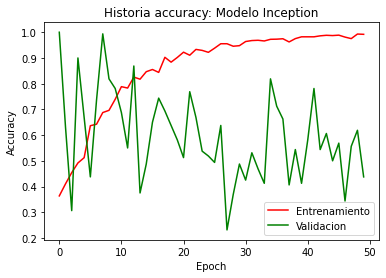

In [ ]:
plt.plot(history_inception.history['accuracy'], color="red")
plt.plot(history_inception.history['val_accuracy'], color="green")
plt.title('Historia accuracy: Modelo Inception')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validacion'])
resultados=os.getcwd()+'/drive/MyDrive/Schneider competition/Resultados'
plt.savefig(resultados+'/Historia_Inception.png');
plt.show()

In [ ]:
y_pred=np.argmax(predictions, axis=1)
y_real= val_generator_inception_v3.classes

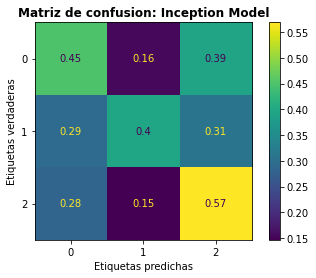

In [ ]:
 from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_real, y_pred, normalize='true')
plt.title("Matriz de confusion: Inception Model", fontweight="bold")
plt.ylabel("Etiquetas verdaderas")
plt.xlabel("Etiquetas predichas")
resultados=os.getcwd()+'/drive/MyDrive/Schneider competition/Resultados'
plt.savefig(resultados+'/Matriz_confusion_Inception.png');

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
predictions_proba=model_inception.predict_generator(generator=val_generator_inception_v3)
Inception_results=pd.DataFrame({'actual':y_real,
                           'p(0)': [p[0] for p in predictions_proba],
                           'p(1)': [p[1] for p in predictions_proba],
                           'p(2)': [p[2] for p in predictions_proba],
                           'predicted': np.argmax(predictions, axis=1)
                            })

<ipython-input-19-9c68a785fe8c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_proba=model_inception.predict_generator(generator=val_generator_inception_v3)


In [ ]:
Inception_results

,actual,p(0),p(1),p(2),predicted
0,0,0.572600,1.066298e-07,0.427400,0
1,0,0.963686,9.482017e-07,0.036313,0
2,0,0.909582,3.653017e-04,0.090053,2
3,0,0.181047,4.173636e-02,0.777216,0
4,0,0.827147,4.376074e-03,0.168477,2
...,...,...,...,...,...
440,2,0.515449,1.070316e-01,0.377520,0
441,2,0.000168,5.715356e-04,0.999260,2
442,2,0.006427,7.795073e-02,0.915623,2
443,2,0.337059,3.442842e-04,0.662597,2


In [ ]:
Inception_results.to_csv(resultados+'/Predicciones_inception.csv')

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score

In [ ]:
from sklearn import metrics
f = open(resultados+"Resultados_Inception.txt",'w')
print(metrics.classification_report(y_real,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5437    0.4508    0.4929       193
           1     0.5347    0.3971    0.4557       136
           2     0.3587    0.5690    0.4400       116

    accuracy                         0.4652       445
   macro avg     0.4790    0.4723    0.4629       445
weighted avg     0.4927    0.4652    0.4677       445



### Efficient Net

I get a poor performance, i'll try with other architecture

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input
EfficientNetB3_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,

    fill_mode='nearest',
    preprocessing_function=preprocess_input
) 
train_generator_EfficientNetB3 = EfficientNetB3_datagen.flow_from_directory(
        train_data_dir,  
        target_size=(300, 300), 
        batch_size=20,
        class_mode="categorical",
        shuffle=True,
)


val_generator_EfficientNetB3 = EfficientNetB3_datagen.flow_from_directory(
        validation_data_dir,  
        target_size=(300, 300), 
        batch_size=32,
        class_mode="categorical",
        shuffle=False,
)

Found 1857 images belonging to 3 classes.
Found 445 images belonging to 3 classes.


In [ ]:
img_shape=(300, 300, 3)
model_name='EfficientNetB3'
EfficientNetB3_model=tensorflow.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
for layer in EfficientNetB3_model.layers[:-15]:
    layer.trainable = False
x = EfficientNetB3_model.output
x = BatchNormalization(axis=-1, epsilon=0.001)(x)
x = Dense(256,activation='relu')(x)
x = Dropout(rate=.3)(x)       
output=Dense(3, activation='softmax')(x)
EfficientNetB3_model = Model(inputs=EfficientNetB3_model.input, outputs=output)


43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
EfficientNetB3_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 300, 300, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 300, 300, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 300, 300, 3)  0           ['normalization[0][0]']    

In [ ]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
EfficientNetB3_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 
history_eff = EfficientNetB3_model.fit(train_generator_EfficientNetB3, epochs=50, validation_data=val_generator_EfficientNetB3,  callbacks =[earlystopping])

Epoch 1/50
93/93 [==============================] - 83s 782ms/step - loss: 1.2076 - accuracy: 0.5105 - val_loss: 1.0961 - val_accuracy: 0.5685
Epoch 2/50
93/93 [==============================] - 66s 708ms/step - loss: 0.9749 - accuracy: 0.5924 - val_loss: 0.9246 - val_accuracy: 0.6157
Epoch 3/50
93/93 [==============================] - 66s 711ms/step - loss: 0.9149 - accuracy: 0.6187 - val_loss: 0.8425 - val_accuracy: 0.6404
Epoch 4/50
93/93 [==============================] - 66s 711ms/step - loss: 0.8470 - accuracy: 0.6478 - val_loss: 0.8717 - val_accuracy: 0.6584
Epoch 5/50
93/93 [==============================] - 66s 714ms/step - loss: 0.8671 - accuracy: 0.6516 - val_loss: 0.8422 - val_accuracy: 0.6742
Epoch 6/50
93/93 [==============================] - 66s 708ms/step - loss: 0.7996 - accuracy: 0.6726 - val_loss: 0.8054 - val_accuracy: 0.6607
Epoch 7/50
93/93 [==============================] - 64s 692ms/step - loss: 0.7717 - accuracy: 0.6887 - val_loss: 0.7751 - val_accuracy: 0.6876

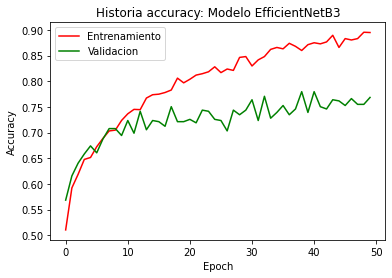

In [ ]:
plt.plot(history_eff.history['accuracy'], color="red")
plt.plot(history_eff.history['val_accuracy'], color="green")
plt.title('Historia accuracy: Modelo EfficientNetB3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validacion'])
resultados=os.getcwd()+'/drive/MyDrive/Schneider competition/Resultados'
plt.savefig(resultados+'/Historia_EfficientNetB3.png');
plt.show()

In [ ]:
predictions_efficient=EfficientNetB3_model.predict_generator(generator=val_generator_EfficientNetB3)

<ipython-input-29-95c4c59c3517>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_efficient=EfficientNetB3_model.predict_generator(generator=val_generator_EfficientNetB3)


In [ ]:
predictions_proba_efficient=EfficientNetB3_model.predict_generator(generator=val_generator_EfficientNetB3)
Efficient_results=pd.DataFrame({'actual':y_real,
                           'p(0)': [p[0] for p in predictions_proba_efficient],
                           'p(1)': [p[1] for p in predictions_proba_efficient],
                           'p(2)': [p[2] for p in predictions_proba_efficient],
                           'predicted': np.argmax(predictions_proba_efficient, axis=1)
                            })



<ipython-input-30-2443e2690602>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_proba_efficient=EfficientNetB3_model.predict_generator(generator=val_generator_EfficientNetB3)


In [ ]:
Efficient_results

,actual,p(0),p(1),p(2),predicted
0,0,0.999994,9.924835e-10,0.000006,0
1,0,0.999826,4.486168e-05,0.000130,0
2,0,0.944947,1.237998e-03,0.053815,0
3,0,0.380160,4.489082e-01,0.170932,1
4,0,0.961522,1.310983e-02,0.025368,0
...,...,...,...,...,...
440,2,0.074893,8.918260e-01,0.033281,1
441,2,0.003870,1.884513e-02,0.977285,2
442,2,0.601581,7.105934e-02,0.327359,0
443,2,0.039223,1.055245e-02,0.950224,2


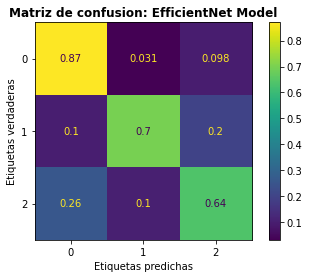

In [ ]:
 from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_real, Efficient_results['predicted'], normalize='true')
plt.title("Matriz de confusion: EfficientNet Model", fontweight="bold")
plt.ylabel("Etiquetas verdaderas")
plt.xlabel("Etiquetas predichas")
resultados=os.getcwd()+'/drive/MyDrive/Schneider competition/Resultados'
plt.savefig(resultados+'/Matriz_confusion_EfficienteNet.png');

In [ ]:
Efficient_results.to_csv(resultados+'/Predicciones_efficient.csv')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_real,Efficient_results['predicted'], digits=4))

              precision    recall  f1-score   support

           0     0.7925    0.8705    0.8296       193
           1     0.8407    0.6985    0.7631       136
           2     0.6167    0.6379    0.6271       116

    accuracy                         0.7573       445
   macro avg     0.7499    0.7356    0.7399       445
weighted avg     0.7614    0.7573    0.7565       445



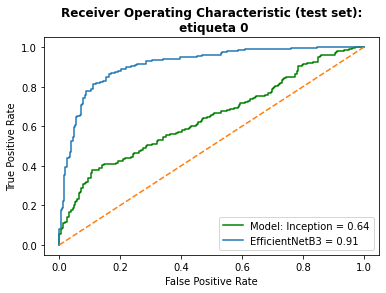

In [ ]:
# select the probabilities for label 0
y_proba = Inception_results['p(0)']
y_proba_efficient = Efficient_results['p(0)']


# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_real, y_proba, pos_label=0)
false_positive_rate_eff, true_positive_rate_eff, thresholds_grid = roc_curve(y_real, y_proba_efficient, pos_label=0)


# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc_eff = auc(false_positive_rate_eff, true_positive_rate_eff)


plt.title('Receiver Operating Characteristic (test set):\n etiqueta 0', fontweight="bold")
# plot the false positive rate on the x axis and the true positive rate on the y axis
plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='Model: Inception = {:0.2f}'.format(roc_auc),
                    color="green")
plt.plot(false_positive_rate_eff,
                    true_positive_rate_eff,
                    label='EfficientNetB3 = {:0.2f}'.format(roc_auc_eff))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig(resultados+'/ROC_etiqueta0.png');


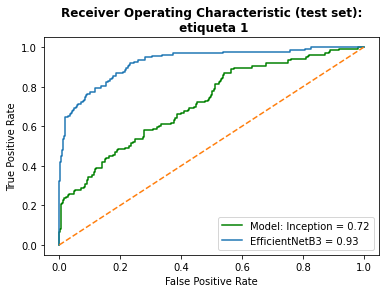

In [ ]:
# select the probabilities for label 0
y_proba = Inception_results['p(1)']
y_proba_efficient = Efficient_results['p(1)']


# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_real, y_proba, pos_label=1)
false_positive_rate_eff, true_positive_rate_eff, thresholds_grid = roc_curve(y_real, y_proba_efficient, pos_label=1)


# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc_eff = auc(false_positive_rate_eff, true_positive_rate_eff)


plt.title('Receiver Operating Characteristic (test set):\n etiqueta 1', fontweight="bold")
# plot the false positive rate on the x axis and the true positive rate on the y axis
plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='Model: Inception = {:0.2f}'.format(roc_auc),
                    color="green")
plt.plot(false_positive_rate_eff,
                    true_positive_rate_eff,
                    label='EfficientNetB3 = {:0.2f}'.format(roc_auc_eff))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig(resultados+'/ROC_etiqueta1.png');



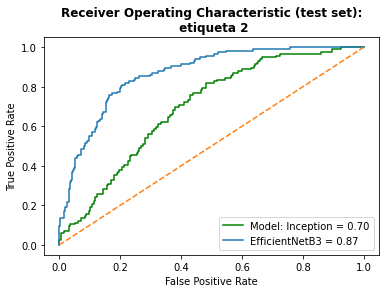

In [ ]:
# select the probabilities for label 0
y_proba = Inception_results['p(2)']
y_proba_efficient = Efficient_results['p(2)']


# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_real, y_proba, pos_label=2)
false_positive_rate_eff, true_positive_rate_eff, thresholds_grid = roc_curve(y_real, y_proba_efficient, pos_label=2)


# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc_eff = auc(false_positive_rate_eff, true_positive_rate_eff)


plt.title('Receiver Operating Characteristic (test set):\n etiqueta 2', fontweight="bold")
# plot the false positive rate on the x axis and the true positive rate on the y axis
plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='Model: Inception = {:0.2f}'.format(roc_auc),
                    color="green")
plt.plot(false_positive_rate_eff,
                    true_positive_rate_eff,
                    label='EfficientNetB3 = {:0.2f}'.format(roc_auc_eff))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig(resultados+'/ROC_etiqueta2.png')


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
for i in os.listdir(test_data_dir):
  img=image.load_img(test_data_dir+'/'+i, target_size=(300,300))
  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images=np.vstack([X])
  val=EfficientNetB3_model.predict(images)

1/1 [==============================] - 0s 34ms/step


In [ ]:
test_data_dir=ruta+"/test"

In [ ]:
test_data_dir

'/content/drive/MyDrive/Schneider competition/train_test_data/test'

In [ ]:
import pandas as pd

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/Schneider competition/test.csv')

In [ ]:
test_df

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png
...,...,...,...,...
630,1.650899,101.314723,2011,train_test_data/test/968.png
631,-1.645649,102.612332,2010,train_test_data/test/54.png
632,-0.557796,114.561609,2016,train_test_data/test/494.png
633,-3.037549,113.872045,2009,train_test_data/test/287.png


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
directory="/content/drive/MyDrive/Schneider competition/train_test_data/test/test/",
x_col="example_path",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(300,300))

Found 0 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:991: UserWarning: Found 635 invalid image filename(s) in x_col="example_path". These filename(s) will be ignored.
  n_invalid, x_col))


In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [ ]:
import cv2
from tensorflow.keras.preprocessing import image as image_utils

In [ ]:
predicciones=[]
for filename in test_df['example_path']:
    # Load original via OpenCV, so we can draw on it and display it on our screen
    original = cv2.imread("/content/drive/MyDrive/Schneider competition/"+filename)

    # Load image while resizing to 224x224 pixels, then convert to a NumPy array because load_img returns 
    # Pillow format
    image = image_utils.load_img("/content/drive/MyDrive/Schneider competition/"+filename, target_size=(224, 224))
    image = image_utils.img_to_array(image)

    """
    PRE-PROCESS
    The image is now a NumPy array of shape (224, 224, 3). 224 pixels tall, 224 pixels wide, 3 channels = 
    Red, Green, Blue. We need to expand to (1, 3, 224, 224) because when classifying images using Deep
    Learning and Convolutional Neural Networks, we often send several images (instead of one) through
    the network in “batches” for efficiency. We also subtract the mean RGB pixel intensity from the
    ImageNet dataset.
    """
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    predicciones.append(EfficientNetB3_model.predict(image))  


1/1 [==============================] - 0s 34ms/step


In [ ]:
predicciones=np.argmax(predicciones, axis=1)

In [ ]:
predicciones

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])